# Linear Regression Implementation

In this homework, you need to implement LR algorithm.
* Generate data
* Implement LinearRegression class methods
* Visualize results

### Imports

In [36]:
import numpy as np 
import matplotlib.pyplot as plt

#### 1. Generate data
* Generate 200 points uniform randomly in range [0,1] and assign it to X (keep random seed)
* Fix b_0 and b_1
* Generate Y line with X, b_0 and b_1
* Add random noise from normal distribution, with (0,0.4) (keep random seed)
* Plot results
* Concatenate ones in X

In [37]:
#code here
np.random.seed(42)
x = np.random.uniform(0,1,200)
b_0 = 2
b_1 = 8
Y = b_0 + b_1*x
eps = np.random.normal(0,0.4,200)
Y = Y + eps
Y = Y.reshape(-1,1)


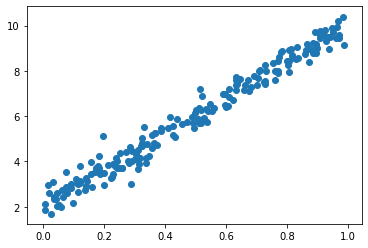

In [38]:
plt.scatter(x,Y)

In [39]:
x = x.reshape(200,1)
x=np.insert(x,0,1,axis=1)


In [40]:
np.random.seed(46)
x_test = np.random.uniform(0,1,200)
b_0_test = 3
b_1_test = 6
Y_test = b_0_test + b_1_test*x_test
eps = np.random.normal(0,0.4,200)
Y_test = Y_test + eps
Y_test = Y_test.reshape(-1,1)

In [41]:
x_test = x_test.reshape(200,1)
x_test=np.insert(x_test,0,1,axis=1)


#### Implement main LinearRegression class

In [42]:
class LinearRegression:
    """
    Linear Regression Class
    You need to implement LR algorithm with 2 different methods(analytical sol. and Gradient Descent)

    """

    def __init__(self):
        """
        Init method
        """
        self.betta = None
        self.alpha = None

    def fit_least_squares(self, X, Y):
        """
        Main fit method.
        Method takes X, Y parameters, find optimal bettas(with analytical solution) and return it
        :param X: (np.array,n*p) features
        :param Y: (np.array,n*1) target variable
        :return: betta (np.array,p*1) 
        """
        self.betta =  np.matmul(np.linalg.inv(np.matmul(np.transpose(X),X)),np.matmul(np.transpose(X),Y))
        return self.betta
         

    def fit_gradient_descent(self, X, Y, alpha, delta):
        """
        Fit with gradient descent optimizer
        Method takes X, Y and method parameters, find optimal bettas(with gradient descent) and return it
        :param X: (np.array,n*p) features
        :param Y: (np.array,n*1) target
        :param alpha: (float) learning rate
        :param delta: (int) threshold for minimum difference between betta_i and betta_i+1
        :return: betta (np.array,p*1) 
        """
      
        beta_n = np.array([0,0]).reshape(-1,1)
        grad = (X.T@(X@ beta_n-Y))/len(X)
        beta_n_plus_1 = beta_n - alpha*grad
        while np.linalg.norm(beta_n_plus_1-beta_n)>delta:
            grad = (X.T@(X@ beta_n_plus_1-Y))/len(X)
            beta_n = beta_n_plus_1
            beta_n_plus_1 = beta_n - alpha*grad
        self.betta = beta_n_plus_1
        return beta_n_plus_1
            
        
        

    def predict(self, X):
        """
        Make prediction with fitted bettas 
        :param X: (np.array,n*p) features
        :return: Y_pred (np.array,n*1) predictions
        """
        Y_pred = np.matmul(X,self.betta)
        return Y_pred
        

    def loss(self, X, Y):
        """
        Method for calculation current loss
        Need to implement Mean Square Error Loss
        :param X: (np.array,n*p) features
        :param Y: (np.array,n*1) target
        :return: (float) Mean Squared Error Loss
        """
        los = ((X@self.betta-Y)** 2).sum()/(2*len(X))
        return los

    def plot_line(self, X, Y):
        """
        Method plots data points and approximated lines for both methods(in one figure)
        :return: None 
        """
        fig, ax = plt.subplots()
        Y_pred = self.predict(X)
        X = np.delete(X,0,axis=1)
        X = X.reshape(200,1)
        ax.scatter(X,Y)
        ax.plot(X,Y_pred,color='red')



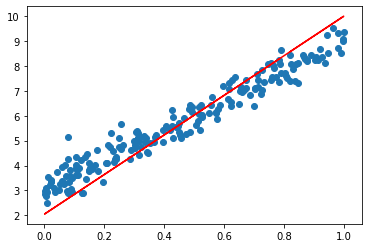

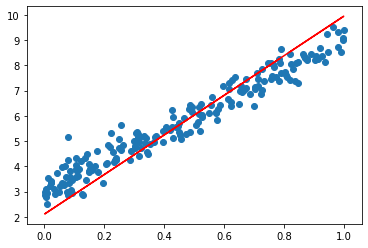

In [43]:
model1 = LinearRegression()
model1.fit_least_squares(x,Y)
model1.loss(x_test,Y_test)
model1.predict(x_test)
model1.plot_line(x_test,Y_test)

model2 = LinearRegression()
model2.fit_gradient_descent(x,Y,0.1,0.001)
model2.loss(x_test,Y_test)
model2.predict(x_test)
model2.plot_line(x_test,Y_test)






